In [18]:
from lib import prob
from lib import vector as vec

In [84]:
# chevalier's game: try 1

# the probability of throwing a 6 on a die roll
p = 1/6  

# given a specific number of throws (a round),
# count how many times 6 shows up
round_count = lambda throws: prob.binomial(throws, p)

# play this game a lot of times, to estimate the likelihood of
# winning if one bets on "at least one 6 shows up in 4 throws of an even die"

n_rounds = 10000
wins = sum([round_count(4) > 0 for _ in range(n_rounds)])
print(f"You won {100 * wins/n_rounds:0.2f}% of {n_rounds} throws")


You won 51.08% of 10000 throws


In [85]:
# chevalier's game: try 2

# create an n-dimensional vector where n is the number of throws
# and each throw is a number between 1 and 6
round = lambda throws: vec.create_random(throws,1,6)

n_rounds = 10000
throws_per_round = 4
wins = 0

# play
for _ in range(n_rounds):
    # we win this round if there is at least one 6 in all throws this round
    round_win = 6 in round(throws_per_round)
    # add to wins
    wins = wins + round_win

print(f"You won {100 * wins/n_rounds:0.2f}% of {n_rounds} throws")


You won 51.77% of 10000 throws


In [74]:
# chevalier's one-up: two dice, pair of sixes

round = lambda throws,dice: list(zip(*[vec.create_random(throws, 1, 6) for _ in range(dice)]))

dice = 2
n_rounds = 1000
winning_throw = (6,6)

# play
for throws_per_round in range(20, 30):
    wins = 0
    for _ in range(n_rounds):
        round_win = winning_throw in round(throws_per_round, dice)
        wins = wins + round_win
    print(f" Throws per round: {throws_per_round} ; chance of a winning throw : {100*wins/n_rounds:0.2f}%")

 Throws per round: 20 ; chance of a winning throw : 40.90%
 Throws per round: 21 ; chance of a winning throw : 42.30%
 Throws per round: 22 ; chance of a winning throw : 45.10%
 Throws per round: 23 ; chance of a winning throw : 47.60%
 Throws per round: 24 ; chance of a winning throw : 49.10%
 Throws per round: 25 ; chance of a winning throw : 52.00%
 Throws per round: 26 ; chance of a winning throw : 50.50%
 Throws per round: 27 ; chance of a winning throw : 53.40%
 Throws per round: 28 ; chance of a winning throw : 56.30%
 Throws per round: 29 ; chance of a winning throw : 56.10%


In [77]:
# what does the distribution of wins look like, for a given number of throws per round?

n_sims = 10000
wins = []

for __ in range(n_sims):
    w = 0
    for _ in range(n_rounds):
        round_win = winning_throw in round(throws_per_round, dice)
        w = w + round_win
    wins.append(w)

In [63]:
import matplotlib.pyplot as plt

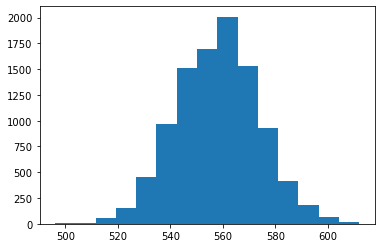

In [82]:
plt.hist(wins, bins = 15)
plt.show()

In [273]:
# What is the likelihood of winning x points  
# in a sequence of n coin flips, if a win scores p points and a loss scores -q points?

# flipping an unbiased coin is a bernoulli trial
coin_flip = lambda: prob.bernoulli(0.5)

def game(n, p, q, stop = False):
    balance = 1
    for _ in range(n):
        outcome = coin_flip()
        balance = balance + (p if outcome else -q)
        # stop playing when you run out of money
        if stop and balance == 0:
            return balance
    return balance

# play the game lots of times

def chance_of_winning(target = 0, trials = 1000):
    wins = [game(40, p, q, stop) == target for _ in range(trials)]
    return sum(wins)/trials

def estimate_chances(plot = False):
    x = list(range(-45,45))
    y = [chance_of_winning(i) for i in x]
    if plot:
        plt.plot(x,y)
        plt.axis([-45,45,0,max(y)])
        plt.show()
    else:
        return x,y
    


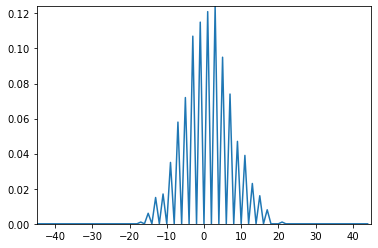

In [274]:
p = 1
q = 1
stop = False # if true, we stop playing the game when we run out of points
estimate_chances(True)

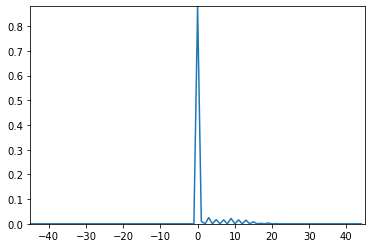

In [275]:
# if we did stop playing when we ran out of money, what would most likely happen?
stop = True
estimate_chances(True)